This notebook follows a guide from the book "Deep Learning with Python" by Francois Chollet on features visualization with CNN's using images.
A similar process will be followed with and audio specific model.

In [8]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from keras.engine.keras_tensor import KerasTensor
from typing import List
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Silence unwanted warnings.
import warnings
warnings.filterwarnings("ignore")


IMAGE_PATH = '../media/images/chomsky_sitting.png'
NUM_LAYERS: int = 6  # Number of layers to extract features from.

## Visualizing hidden layer activations.

##### Load image

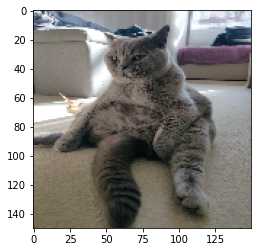

In [9]:
img: np.ndarray = img_to_array(load_img(IMAGE_PATH, target_size=(150, 150)))
img = np.expand_dims(img, axis=0) / 255

plt.imshow(img[0])
plt.show()

##### Load VGG model for feature extraction.

In [10]:
model: Model = ResNet50V2(weights='imagenet', include_top=False)
layer_output: List[KerasTensor] = [layer.output for layer in model.layers[:NUM_LAYERS]]
activation_model = Model(inputs=model.input, outputs=layer_output)

model.summary()

94683136/94668760 [==============================] - 9s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                        

Run image through model, and collect all neuron activations into a list.

(1, 156, 156, 3)


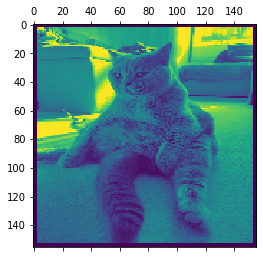

In [11]:
activations: List[np.ndarray] = activation_model.predict(img)
first_layer_activation: np.ndarray = activations[1]  # First convulsion layer in VGG model.

print(first_layer_activation.shape)

# Visualize 3rd neuron from the first Conv layer.
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

Visualize first 16 neurons from the first 8 layers of the VGG model.

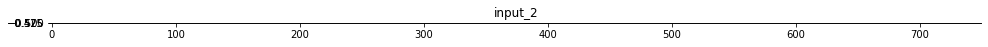

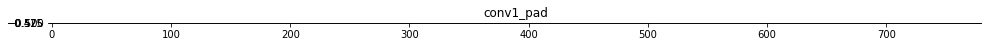

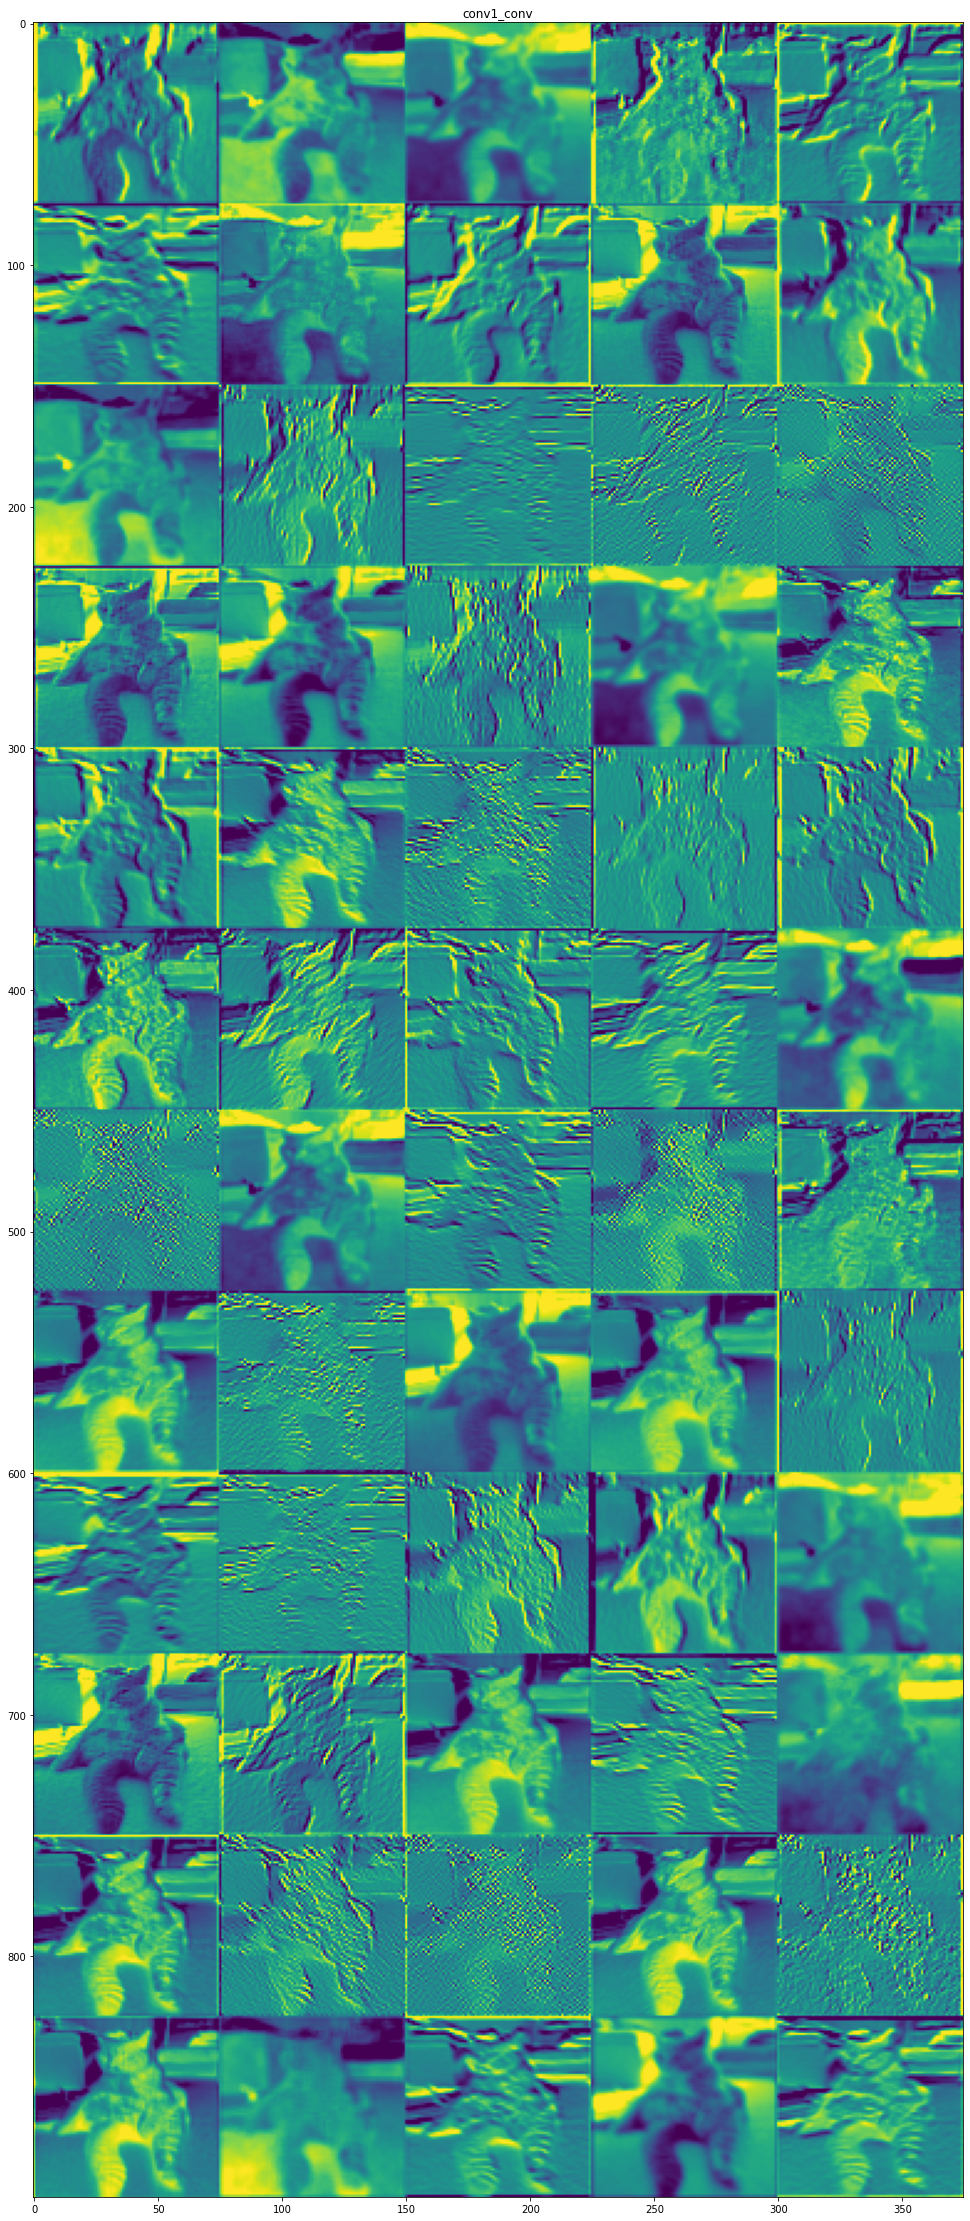

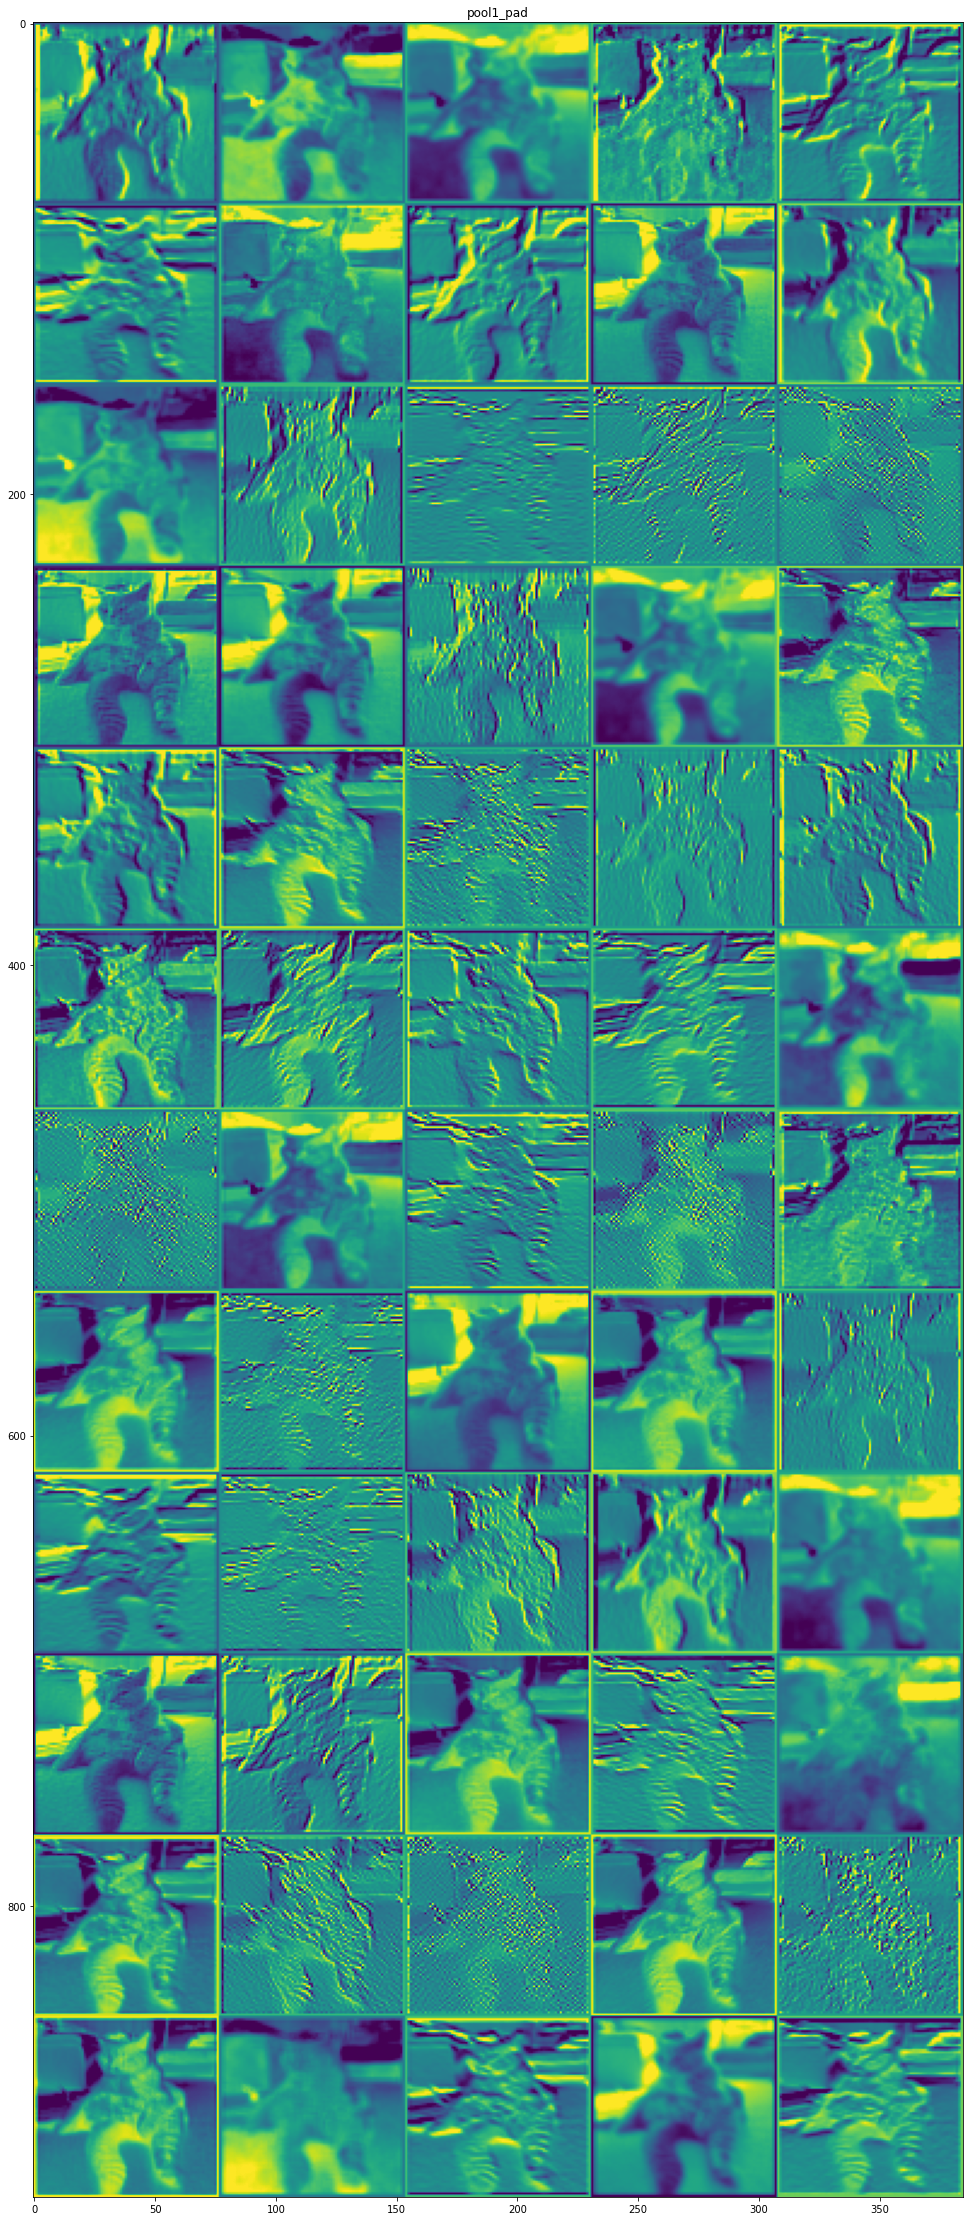

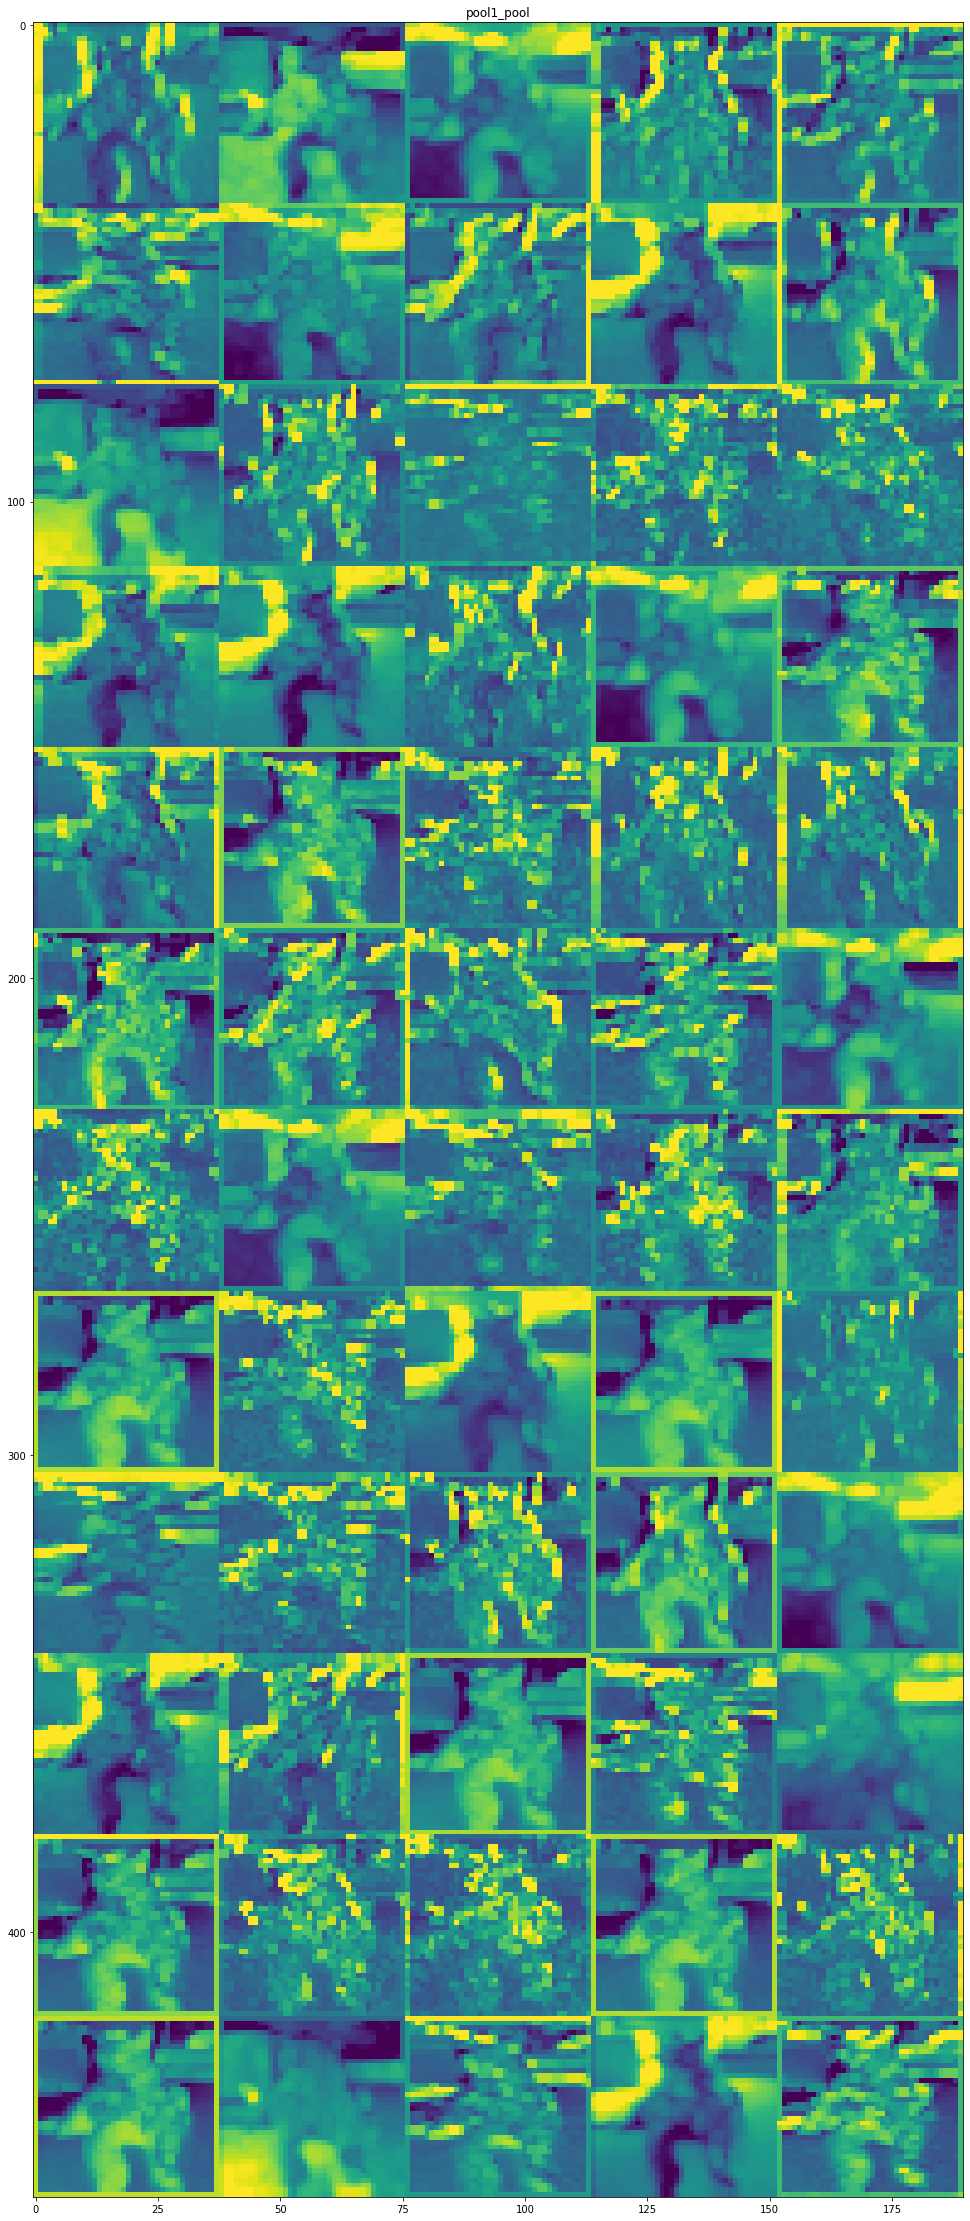

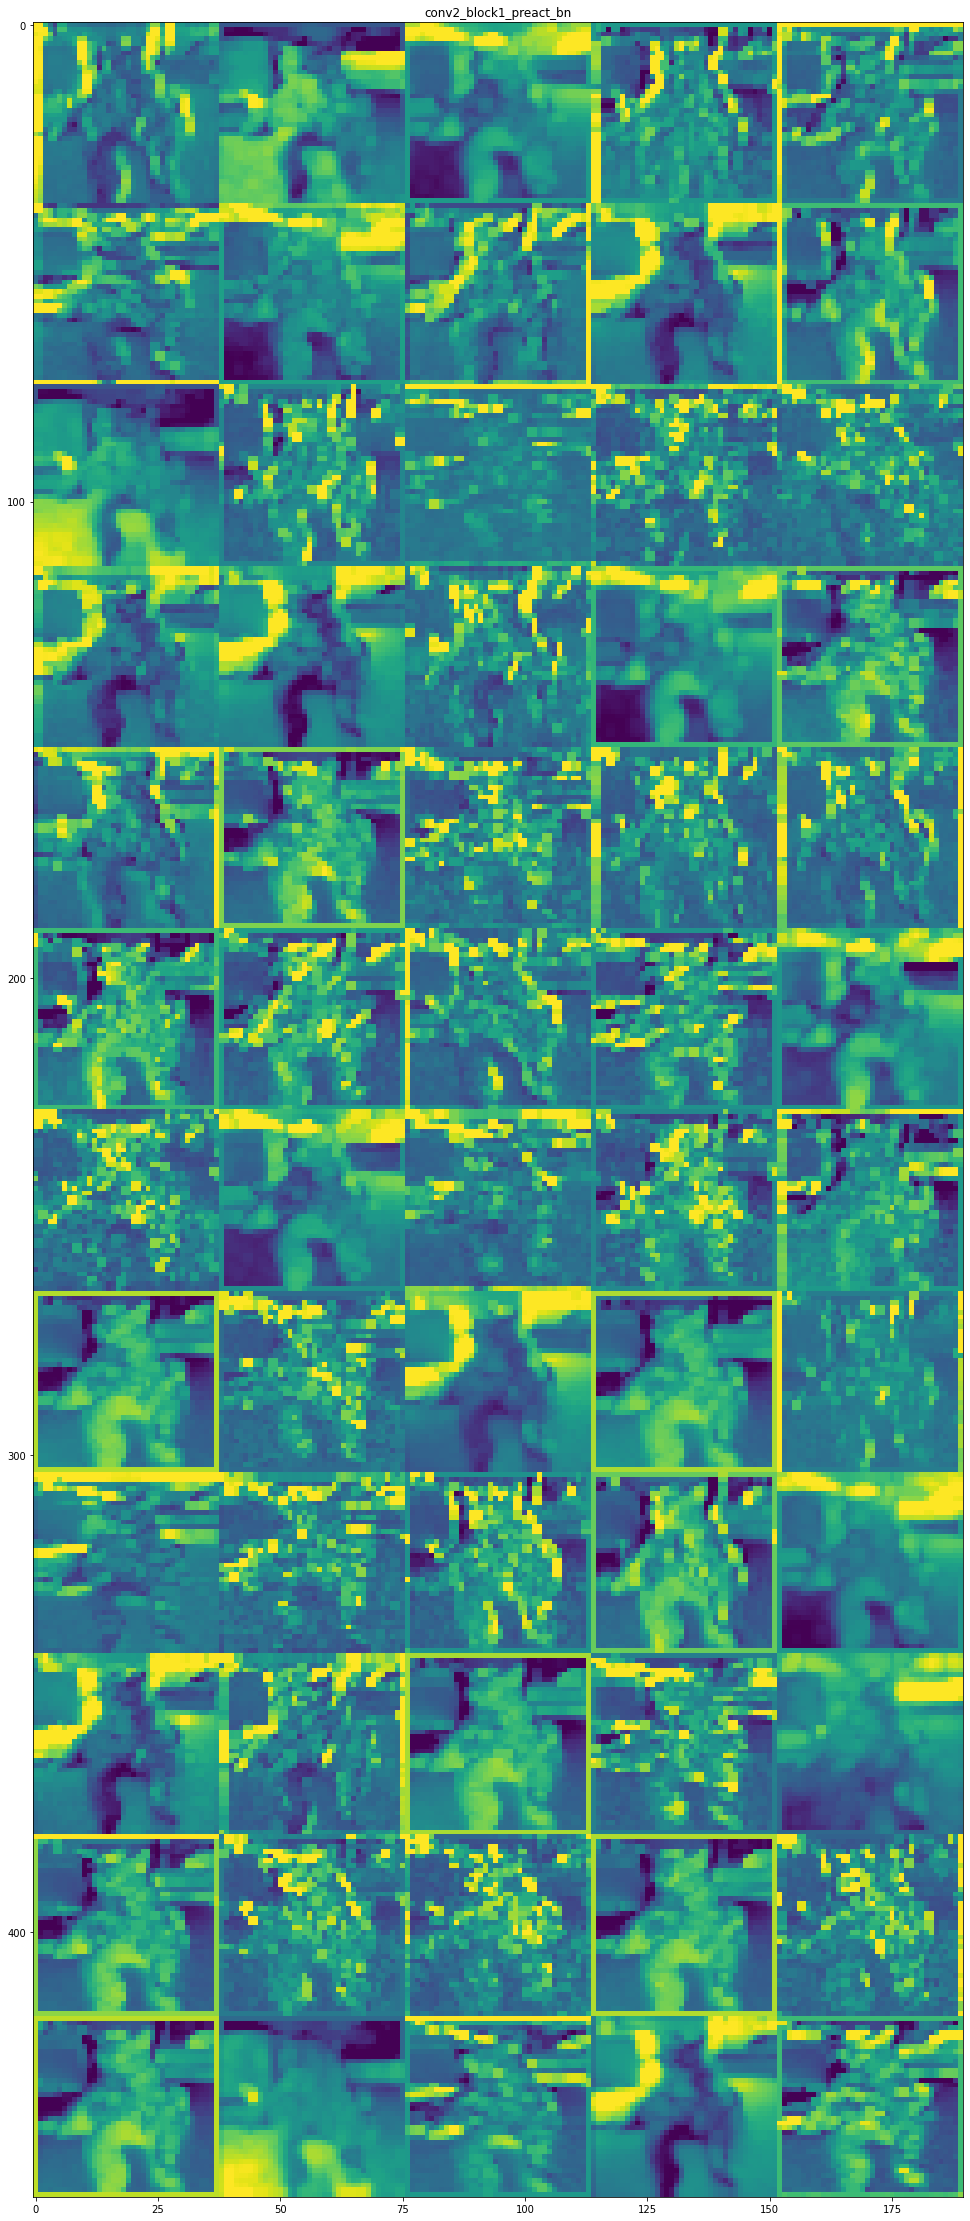

In [12]:
layer_names: List[str] = []

for layer in model.layers[0:NUM_LAYERS]:
    layer_names.append(layer.name)

images_per_row: int = 5

for layer_name, layer_activation in zip(layer_names, activations):
    n_features: int = layer_activation.shape[-1]
    size: int = layer_activation.shape[1]
    n_cols: int = n_features // images_per_row
    display_grid: np.ndarray = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            # Pre-processing to make images visually palatable.
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')

            display_grid[
            col * size: (col + 1) * size,
            row * size: (row + 1) * size
            ] = channel_image

    scale: float = 1.0 / (size * 0.3)

    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')